In [1]:
##Import modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.utils import pad_sequences
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SURESH
[nltk_data]     BEEKHANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# from tensorflow.keras.layers import LSTM

In [3]:
# Load the CSV file from the specified path
imbalance_data = pd.read_csv(r"D:\Hate-Speech-Classifier\artifacts\data_ingestion\imbalanced_data.csv")

In [4]:
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

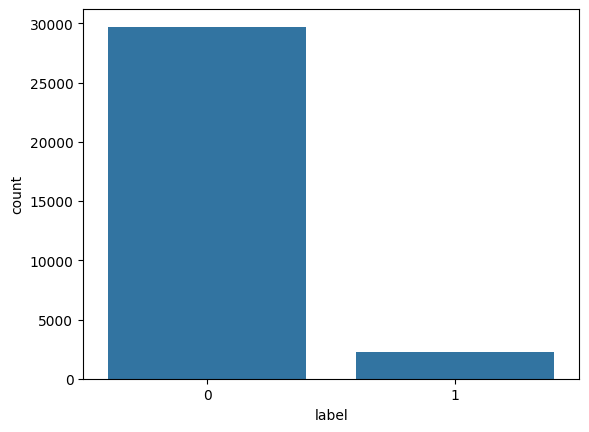

In [5]:
sns.countplot(x= 'label', data= imbalance_data)

In [6]:
imbalance_data.shape

(31962, 3)

In [7]:
imbalance_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
imbalance_data.drop('id', axis=1, inplace=True)

In [9]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
raw_data= pd.read_csv(r"D:\Hate-Speech-Classifier\artifacts\data_ingestion\raw_data.csv")

In [12]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
raw_data.shape

(24783, 7)

In [14]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [15]:
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'], axis=1, inplace=True)

In [16]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [17]:
raw_data["class"].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

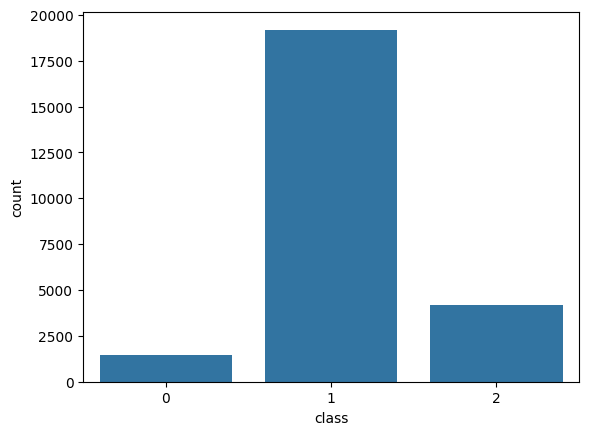

In [18]:
sns.countplot(x='class',data =raw_data)

- class 0: hate
- class 1: abusive
- class 2: no hate

In [19]:
raw_data[raw_data['class'] == 0]["class"]=1

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_1344\1031542943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class'] == 0]["class"]=1


In [20]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [21]:
raw_data['class'].unique()

array([2, 1, 0])

In [22]:
raw_data["class"].replace({0:1},inplace=True)

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_1344\2306797704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({0:1},inplace=True)


In [23]:
raw_data["class"].unique()

array([2, 1])

In [24]:
raw_data["class"].replace({2:0}, inplace = True)

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_1344\137163590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({2:0}, inplace = True)


In [25]:
raw_data["class"].unique()

array([0, 1])

<Axes: xlabel='class', ylabel='count'>

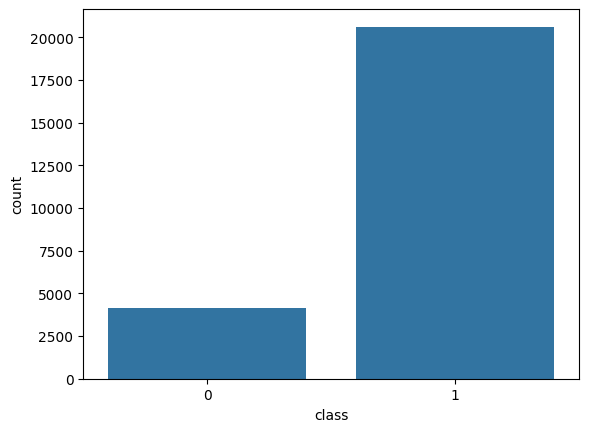

In [26]:
sns.countplot(x='class',data=raw_data)

In [27]:
raw_data.rename(columns={'class':'label'},inplace =True)

In [28]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [29]:
frame = [imbalance_data, raw_data]
df = pd.concat(frame)

In [30]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [31]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

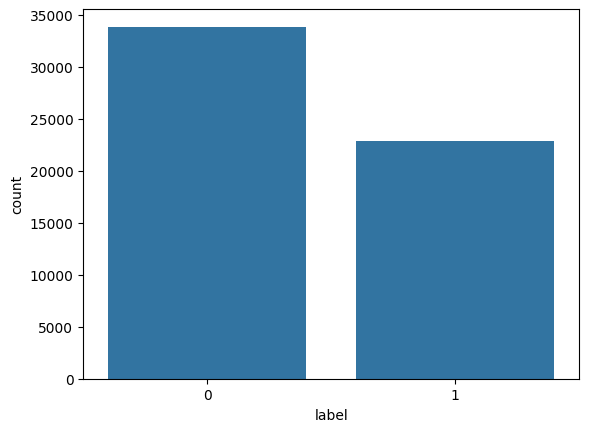

In [32]:
sns.countplot(x='label',data=df)

In [33]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [34]:
import string

In [35]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [36]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [37]:
df["tweet"][1]

1    user user thanks for lyft credit i cant use ca...
1     rt  boy dats coldtyga dwn bad for cuffin dat ...
Name: tweet, dtype: object

In [38]:
df.head()

,label,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesti bihday your majesti ...
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motiv factsguide s...


In [39]:
x = df['tweet']
y = df['label']

In [40]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


In [41]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)


sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [42]:
sequences_matrix

array([[    0,     0,     0, ...,   209, 13070,  4452],
       [    0,     0,     0, ...,   248,     3,   653],
       [    0,     0,     0, ...,     1,  1831, 41012],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33462],
       [    0,     0,     0, ...,   954, 14416,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

In [43]:
sequences_matrix[0].shape

(300,)

In [ ]:
sequences_matrix[100].shape

(300,)

In [44]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


d:\Hate-Speech-Classifier\env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
y_train

24029    0
769      1
8305     0
2848     0
12998    1
        ..
22381    1
6196     1
860      1
15795    0
24460    1
Name: label, Length: 42558, dtype: int64

In [46]:
sequences_matrix

array([[    0,     0,     0, ...,   209, 13070,  4452],
       [    0,     0,     0, ...,   248,     3,   653],
       [    0,     0,     0, ...,     1,  1831, 41012],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33462],
       [    0,     0,     0, ...,   954, 14416,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

In [47]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

266/266 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8358 - loss: 0.3792 - val_accuracy: 0.9367 - val_loss: 0.1765


In [48]:
x_test

12238    kim k is alright but honestly so many niggas b...
14377    rt bigjonbul the stars wink knowingly and smil...
17207    rt sassymermaidxo   my sister shittin on you h...
22168    those tell me about yourself  lookin ass nigga...
18801     days ago  to celebrate national iced tea day ...
                               ...                        
29909    singalong aiculatie all those who are hangin r...
9247                fuck boi fag fuck boi fag fuck boi fag
6861     pricelessxxx u good man long time my niggah pr...
12104     user have a great day dont forget to send you...
21552    the family of ron oneal needs to sue wutang fo...
Name: tweet, Length: 14187, dtype: object

In [49]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [50]:
test_sequences_matrix[0].shape

(300,)

In [51]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 60s 134ms/step - accuracy: 0.9316 - loss: 0.1881


In [52]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step


In [53]:
lstm_prediction

array([[0.99103194],
       [0.0636254 ],
       [0.864256  ],
       ...,
       [0.94448036],
       [0.02259243],
       [0.16985771]], dtype=float32)

In [54]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)


In [55]:
res

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [56]:
print(confusion_matrix(y_test,res))

[[8173  280]
 [ 713 5021]]


In [57]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [61]:
# Let's save the mdoel.
model.save("model.h5")

In [62]:
import keras

In [63]:
load_model=keras.models.load_model("model.h5")

with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [65]:
# Let's test our model on custom data.
test = 'Humans are aggressive @,i will kill that man'


def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


Humans are aggressive @,i will kill that man
humans are aggressive i will kill that man
['human aggress kill man']
[[939, 448, 115]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
pred [[0.39134112]]
no hate
